# 1.Define Business Case / Problem Statements.

Task 1:- Prepare a complete data analysis report on the given data.


Task 2:-
●	Prepare the data, identifying and extracting key features (both input and output parameters) relevant to the problem you will solve.
●	Build and train a machine learning model. Here you can evaluate different algorithms, settings and see which model is best for your scenario.


Task 3:-  Create a machine learning model to predict the insurance price charged to the customer. The charge depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses.


# 2.Import Basic Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from pandas_profiling import ProfileReport

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_squared_error ,mean_absolute_error 

from sklearn.model_selection import GridSearchCV

# 3.Load Data.

In [3]:
df = pd.read_csv("datas_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Overview Report of Dataset

prof = ProfileReport(df)
prof.to_file(output_file='InsCostPred.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4.Domain Analysis

# 5.Basic Checks


In [5]:
# To check size of data
df.shape

(1338, 7)

In [6]:
# To check first five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#To check random five rows
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1187,62,female,32.680,0,no,northwest,13844.79720
889,57,male,33.630,1,no,northwest,11945.13270
367,42,female,24.985,2,no,northwest,8017.06115
276,19,male,20.615,2,no,northwest,2803.69785
1305,24,female,27.720,0,no,southeast,2464.61880


In [8]:
#To check last five rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
# To print all the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
#To check memory uses or basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#Statistical analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
df.isnull().mean()*100 # Percentage of null values in the data

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [13]:
# To check duplicated values

df.duplicated().sum()

1

In [14]:
#To drop duplicated value

df.drop_duplicates(inplace=True)

In [15]:
#To check duplicated value

df.duplicated().sum()

0

In [16]:
#To check df after removing duplicated values.

df.shape

(1337, 7)

In [17]:
#To take a backup of the dataset.
backup = df.copy()

In [18]:
# Featch numerical columns

num_col=df.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [19]:
# Featch categorical columns

cat_col=df.select_dtypes(include=['object'])
cat_col.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
# find unique in categorical columns

for i in cat_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

sex ['female' 'male']
sex
male      675
female    662
Name: count, dtype: int64
******************
smoker ['yes' 'no']
smoker
no     1063
yes     274
Name: count, dtype: int64
******************
region ['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
******************


In [21]:
# find unique in numerical columns

for i in num_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

age [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
******************
bmi [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  2

# 6.Exploratory Data Analysis

***i).Univariate Analysis***

In [22]:
#Sweetviz Report for univariate data analysis

my_report = sv.analyze(df)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***ii).Bivariate Analysis***

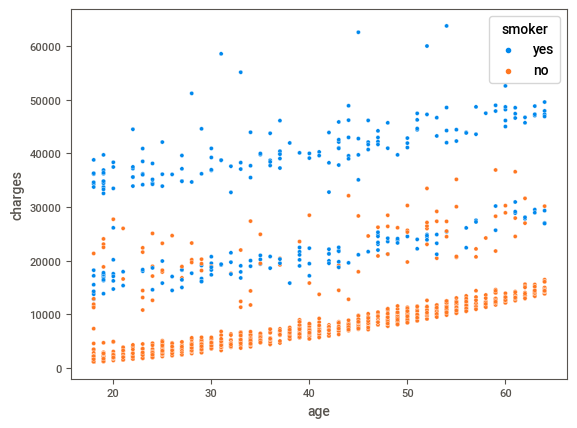

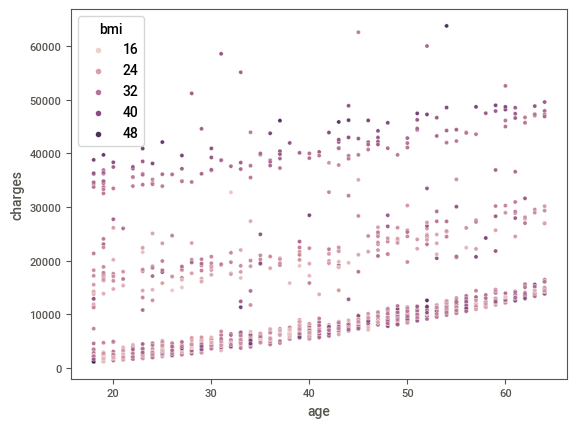

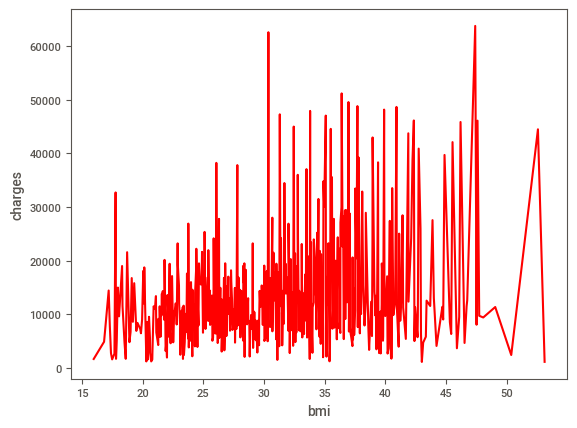

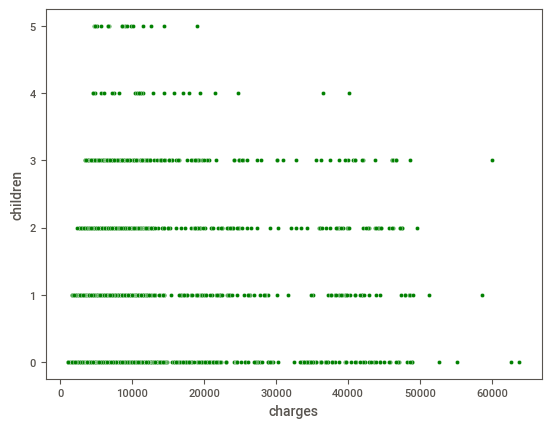

In [23]:
#Numerical columns

# Relation of age and chagres

sns.scatterplot(x="age",y="charges",data=df,hue='smoker',color='orange')
plt.show()


sns.scatterplot(x="age",y="charges",data=df,hue='bmi')
plt.show()

# Relation of bmi and charges

sns.lineplot(x="bmi",y="charges",data=df,ci=None,color='red')
plt.show()

#Relation of children and charges

sns.scatterplot(x="charges",y="children",data=df,color='green')
plt.show()

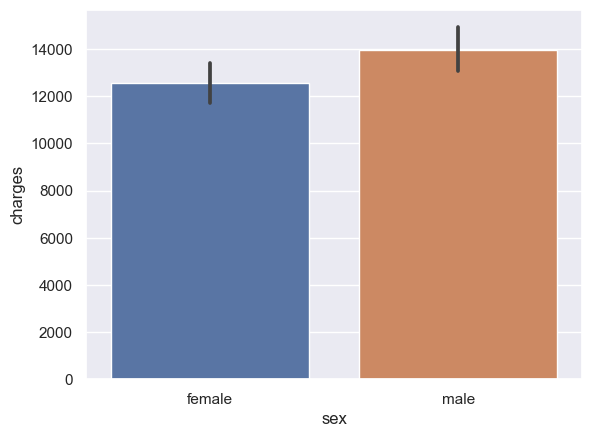

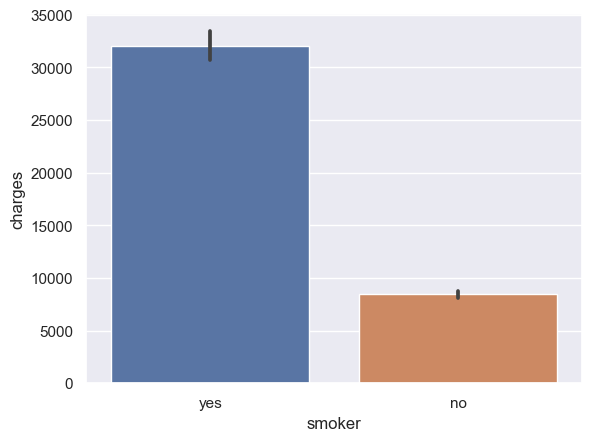

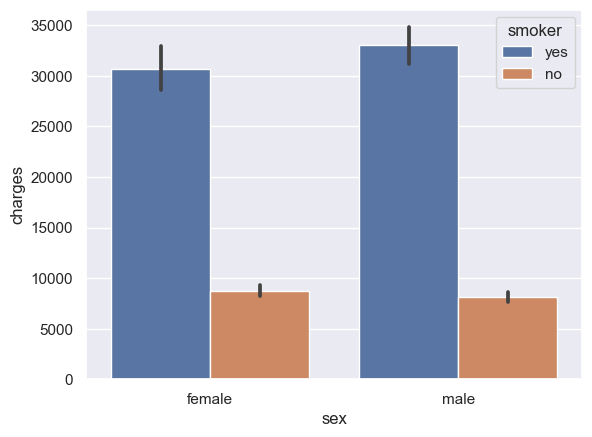

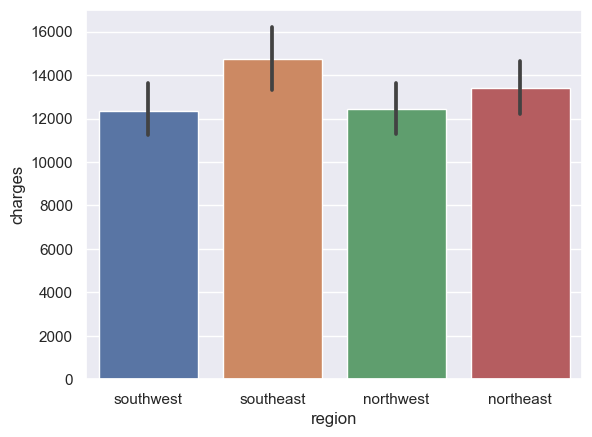

In [24]:
# Categorical columns

# Relation of sex and charges

sns.set(style="darkgrid")
sns.barplot(data=df,x='sex',y='charges')
plt.show()

# Relation of smoker and charges

sns.set(style="darkgrid")
sns.barplot(data=df,x='smoker',y='charges')
plt.show()

sns.set(style="darkgrid")
sns.barplot(data=df,x='sex',y='charges',hue='smoker')
plt.show()

# Relation of region and charges

sns.set(style="darkgrid")
sns.barplot(data=df,x='region',y='charges')
plt.show()

***iii).Multivariate Analysis***

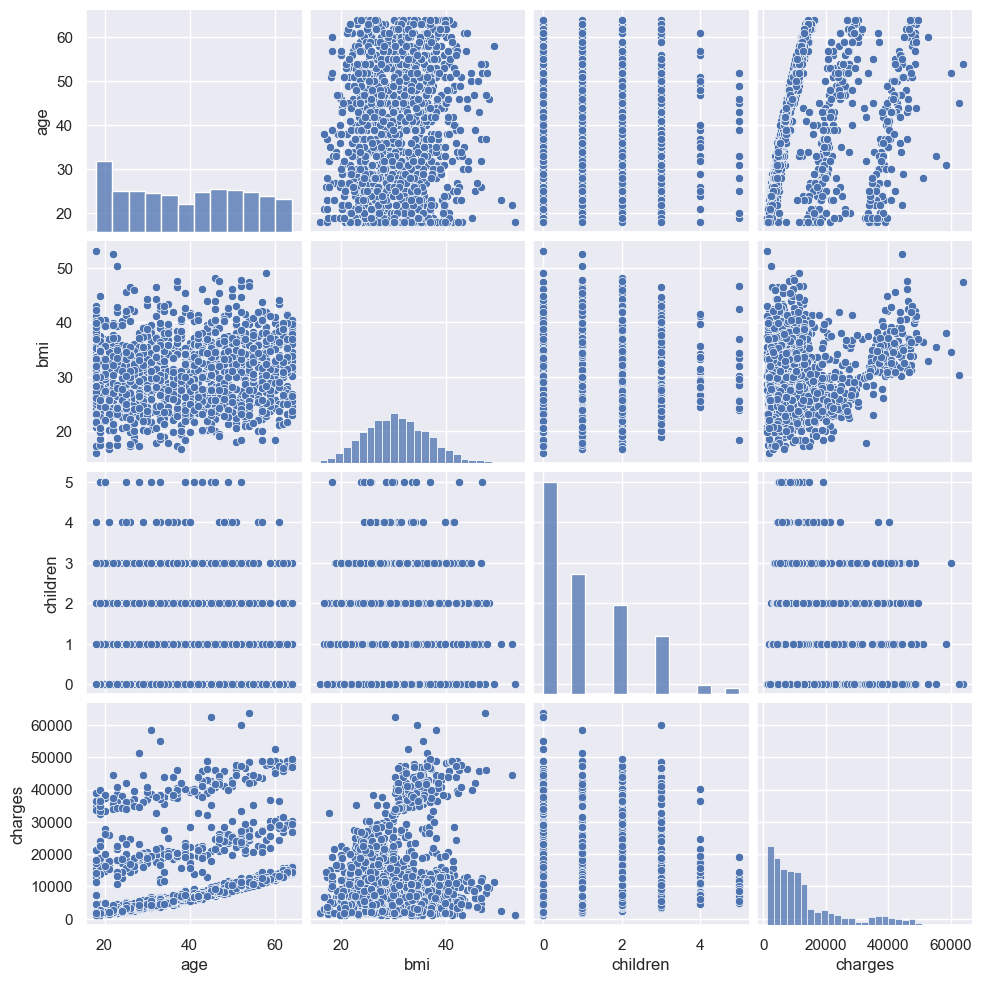

In [25]:
sns.pairplot(df)
plt.show()

# 7.Data Preprocessing

***i).Handling Outliers***

In [26]:
num_col.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

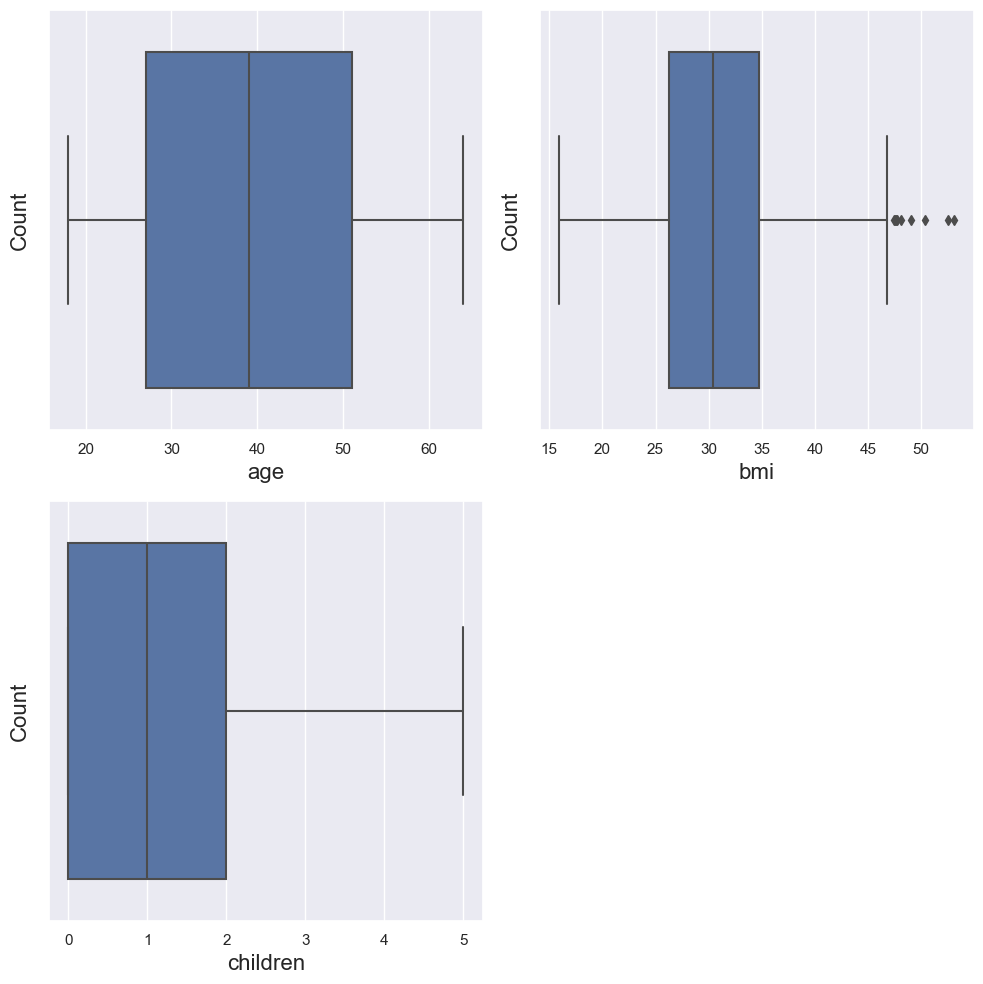

In [27]:
# check outliers.

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1 # Initialize count
for column in num_col.drop(columns=["charges"],axis=1):
    if plotnumber < 4:# Total no.of column of range (1 to 4)
        ax=plt.subplot(2,2,plotnumber) # It mention rows and column in canva
        sns.boxplot(x=num_col[column])
        plt.xlabel(column,fontsize=16)
        plt.ylabel("Count",fontsize=16)
    plotnumber +=1
plt.tight_layout() # Fit Your Plot Properly.

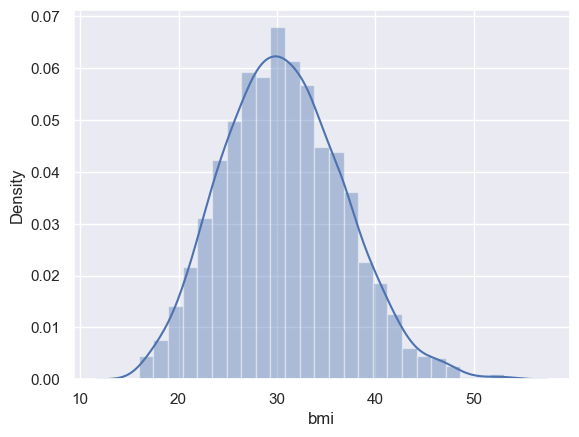

Skewness is: 0.28391419385321137


In [28]:
sns.distplot(df['bmi'])
plt.show()
print("Skewness is:",df['bmi'].skew())

**bmi**

In [29]:
#Basic info about column
df["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [30]:
lower_limit=df['bmi'].mean()-3*df['bmi'].std()
upper_limit=df['bmi'].mean()+3*df['bmi'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 12.362046528819015
upper_limit 48.96485698651382


In [31]:
# Find value less than lower limit

df.loc[df['bmi']>upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [32]:
# To find percentage of outliers.

len(df.loc[df['bmi']>upper_limit] )/len(df)

0.0029917726252804786

In [33]:
# To find value below lower_limit.

df.loc[df['bmi']<lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [34]:
df.loc[df['bmi']>upper_limit,"bmi"]=df['bmi'].mean()

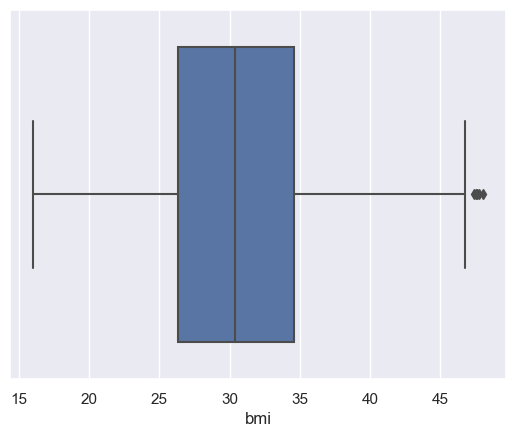

In [35]:
sns.boxplot(x=df['bmi'])
plt.show()

***ii).Handling Categorical Data***

In [36]:
cat_col.columns

Index(['sex', 'smoker', 'region'], dtype='object')

**sex**

In [37]:
# Using pandas OneHotEncoading

df['sex'] = pd.get_dummies(df['sex'],drop_first=True)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,yes,southwest,16884.92400
1,18,True,33.770,1,no,southeast,1725.55230
2,28,True,33.000,3,no,southeast,4449.46200
3,33,True,22.705,0,no,northwest,21984.47061
4,32,True,28.880,0,no,northwest,3866.85520


In [38]:
df['sex']=df['sex'].astype(int)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


**smoker**

In [39]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [40]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [41]:
#Manually Encoading

df['smoker']=df['smoker'].map({'no':1,'yes':0})

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


**region**

In [43]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [44]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [45]:
#Manually Encoading

df['region'] = df['region'].map({'southeast':3,'southwest':2,'northwest':1,'northeast':0})

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,2,16884.92400
1,18,1,33.770,1,1,3,1725.55230
2,28,1,33.000,3,1,3,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


***iii).Scaling***

In [47]:
# Applying MinMaxScaler

MSc = MinMaxScaler()

In [48]:
df[['age','bmi']] = MSc.fit_transform(df[['age','bmi']])

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.371847,0,0,2,16884.92400
1,0.000000,1,0.554656,1,1,3,1725.55230
2,0.217391,1,0.530676,3,1,3,4449.46200
3,0.326087,1,0.210059,0,1,1,21984.47061
4,0.304348,1,0.402367,0,1,1,3866.85520


# 8.Feature Engineering

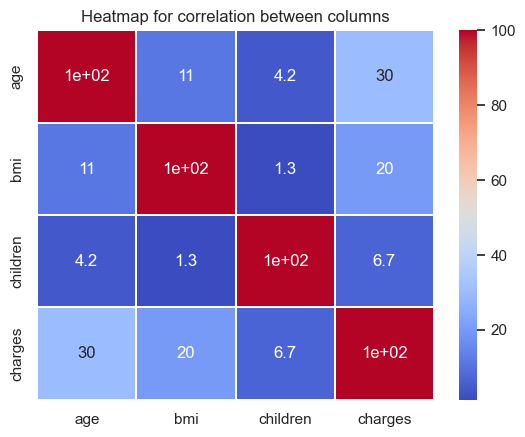

In [50]:
# Checking correlation using heatmap

sns.heatmap(num_col.corr()*100,annot=True,cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

# 9.Split Data into x and y

In [51]:
# Creating independent and dependent variable

X = df.iloc[:,:-1] # Independent Variable.
y = df['charges']# Dependent Variable.

In [52]:
X.sample(5)

,age,sex,bmi,children,smoker,region
360,0.652174,0,0.508876,2,1,0
694,0.195652,0,0.586733,1,1,2
463,0.826087,1,0.310651,0,1,0
292,0.152174,1,0.921208,2,0,3
341,0.956522,1,0.437870,0,1,1


In [53]:
y.sample(5)

652      8280.6227
252     44260.7499
1154    11015.1747
418     14418.2804
729      6781.3542
Name: charges, dtype: float64

# 10.Split data for trainning and testing

In [54]:
## preparing training and testing data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1002, 6), (335, 6), (1002,), (335,))

# 11.Model Building and Evaluation

In [56]:
# Create key value pairs of models

models = {
    'Linear Regrssion':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge Regression':Ridge(),
    'Random Forest Regressor':RandomForestRegressor(random_state = 13),
    'XGB Regressor':XGBRegressor(random_state = 42),
    'Gradient Boosting Regessor':GradientBoostingRegressor(random_state = 42),
    'KNN Regressor': KNeighborsRegressor()
}

In [57]:
# To create a function for model evaluation.

def evaluation(X_train, X_test, y_train, y_test, models):
    for key,value in models.items():
        model = value.fit(X_train,y_train)
        y_predict_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        r2_train = r2_score(y_true = y_train,
                            y_pred = y_pred_train)
        
        r2 = r2_score(y_true = y_test,
                      y_pred = y_predict_test)
        
        mse = mean_squared_error(y_true = y_test,
                                 y_pred = y_predict_test)
        mae = mean_absolute_error(y_true = y_test,
                                  y_pred = y_predict_test)
        print(key)
        print(f'r2_score_train : {r2_train}')
        print(f'r2_score : {r2}')
        print(f'RMSE : {np.sqrt(mse)}')
        print(f'MAE : {mae}')
        print("******************************")
        print("\n")

In [58]:
# To provides parameters in the evaluation function

evaluation(X_train, X_test, y_train, y_test, models)

Linear Regrssion
r2_score_train : 0.7295376368401438
r2_score : 0.7963404660705421
RMSE : 5934.200222309001
MAE : 4080.623656767052
******************************


Lasso Regression
r2_score_train : 0.7295372523557203
r2_score : 0.7962528211021174
RMSE : 5935.476977775583
MAE : 4080.168179563061
******************************


Ridge Regression
r2_score_train : 0.7294803591901731
r2_score : 0.7948743411279582
RMSE : 5955.521779880932
MAE : 4086.264702208157
******************************


Random Forest Regressor
r2_score_train : 0.9747882281244992
r2_score : 0.8688234569228922
RMSE : 4762.532074385918
MAE : 2620.4420451841797
******************************


XGB Regressor
r2_score_train : 0.9962804083088644
r2_score : 0.8388729514343052
RMSE : 5278.299737080737
MAE : 3073.088110559318
******************************


Gradient Boosting Regessor
r2_score_train : 0.8960505833987389
r2_score : 0.8842537219607588
RMSE : 4473.6637659439675
MAE : 2580.497250510905
***************************

***Project Report***



***Conclusion***

We get best result in Random Forest Regressor,XGB Regressor and Gradient Boosting Regressor but we consider **Gradient Boosting Regressor** because it resolve underfit and overfit problem.

In [60]:
#To dump a final model file

pickle.dump(GradientBoostingRegressor,open('InsCostPred.pkl','wb'))